In [2]:
# FEATURE ENGINEERING IN PYTHON

In [3]:
#import important necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

In [4]:
# Working on heart disease predictions
# which ages are likely to have heart problems?

In [5]:
# load dataset
data = pd.read_csv("heart.csv")

#see that dataset is loaded successfully
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
# check what we are working with
# inspect how big our data set is
size_of_dataset = data.shape
print(size_of_dataset)

(303, 14)


In [7]:
# inspect data types
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
# Data cleaning and pre-processing
# 1. check for missing values / empty cells
empty_cells = data.isnull().sum()
print(empty_cells)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# 2. Check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)

1


In [10]:
# know which exact row has this dupicate
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)

# get the duplicated rows index
print(duplicated_rows.index)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   4     2       1  
164      2   4     2       1  
Index([163, 164], dtype='int64')


In [11]:
# Eliminate the duplicate
eliminate_duplicates = data.drop_duplicates(keep="first", inplace=True)

print(eliminate_duplicates)

#check for duplicates again
new_duplicate_status = data.duplicated().sum()
print(f"Number of duplicates:{new_duplicate_status}")


None
Number of duplicates:0


In [12]:
# 3. check for wrong data format (different data types) e.g 1/7/2024, 172024 or 1.4, 1.45, 1.5, 155
# columns with wrong data types will always have an object data type except for strings because their correct data type is object.

# check for data types
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [19]:
# Feature engineering
#select the top 10 features based on the chi - squared test

# Feature engineering also involves renaming the columns of your data to
# eliminate  white spaces in the column titles


x = data.drop("target", axis=1) # all columns except target
y = data["target"] # the target column

selector = SelectKBest(chi2, k=10)
x_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [14]:
# IMPORTANT NOTES
# Every dataset must have a target column, usually have 0s and 1s
# sometimes titles are coded like al, a2 and then they must have a readme file which acts as a descripter for the coded titles.
# How do we know that this column is the target column
# most cases it is in the last column of the data set, in situations where its not, we need to analyse the data and find it
# The target column is used for training (a)models

In [15]:
# Notes on the datasets
# target column, is the heart diseas status, where, o = no heart disease,
# 1 presence of heart disease

In [16]:
# FEATURE SCALING AND NORMALISATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Normalize the features
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

#Convert scaled feature back to datafarme

In [21]:
#DATA SPLITTING
from sklearn.model_selection import train_test_split


x = data.drop('target', axis=1)  
y = data['target']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
# Cross validation
# Used to evaluate performance  of the data, multiple folds

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


model = RandomForestClassifier()
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(model, x, y, cv=cv, scoring = "accuracy")
print("Cross validation accuracy: ", scores.mean())


Cross validation accuracy:  0.8044262295081968


In [24]:
# Training and Evaluating the model
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test Score Accuracy: ", accuracy_score(y_test, y_pred))

Test Score Accuracy:  0.8131868131868132


Logistic Regression Accuracy: 0.8241758241758241
Logistic Regression Precision: 0.8235294117647058
Logistic Regression Recall: 0.8571428571428571
Logistic Regression F1_score: 0.84
Logistic Regression ROC AUC: 0.8214285714285714


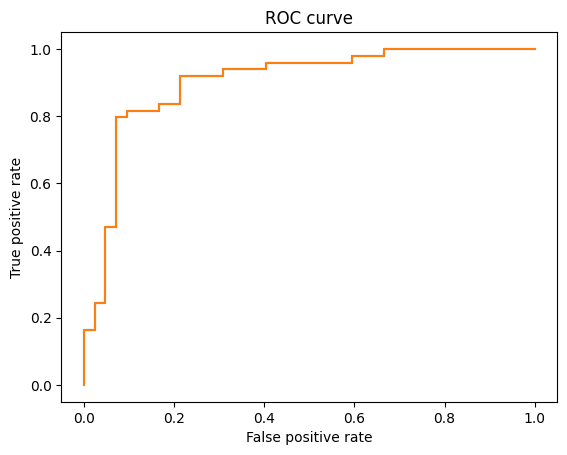

Decision Tree Accuracy: 0.8241758241758241
Decision Tree Precision: 0.8837209302325582
Decision Tree Recall: 0.7755102040816326
Decision Tree F1_score: 0.8260869565217391
Decision Tree ROC AUC: 0.8282312925170068


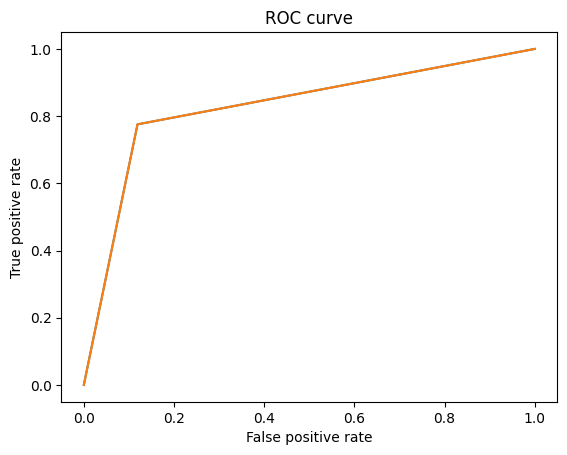

Random Forest Accuracy: 0.8461538461538461
Random Forest Precision: 0.8723404255319149
Random Forest Recall: 0.8367346938775511
Random Forest F1_score: 0.8541666666666666
Random Forest ROC AUC: 0.8469387755102041


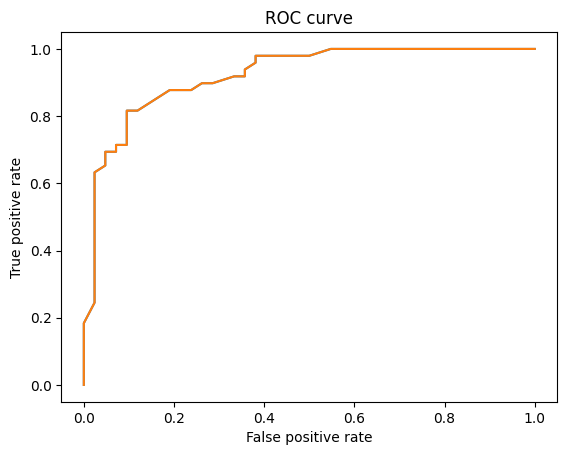

KNN Accuracy: 0.6813186813186813
KNN Precision: 0.6923076923076923
KNN Recall: 0.7346938775510204
KNN F1_score: 0.7128712871287128
KNN ROC AUC: 0.6768707482993197


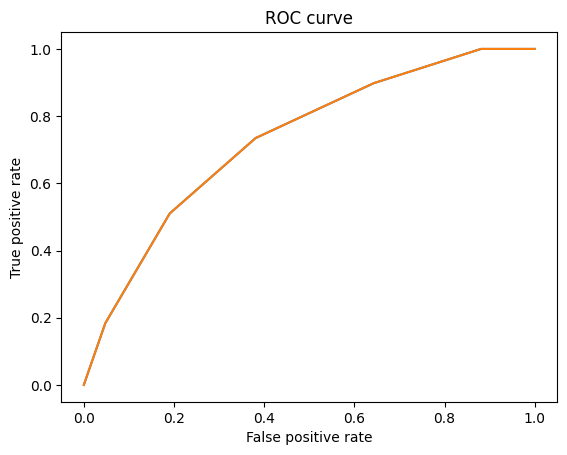

SVM Accuracy: 0.7142857142857143
SVM Precision: 0.6885245901639344
SVM Recall: 0.8571428571428571
SVM F1_score: 0.7636363636363637
SVM ROC AUC: 0.7023809523809524


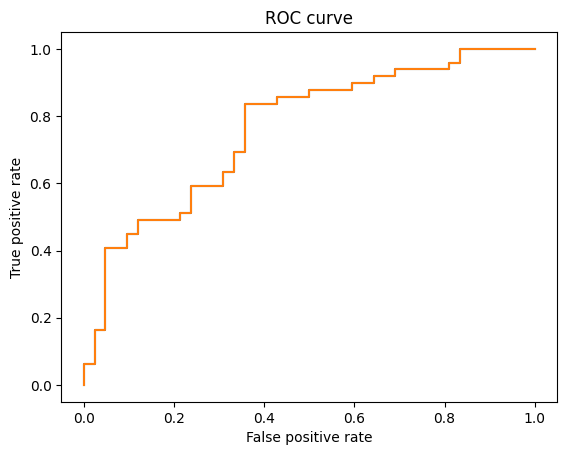

AttributeError: 'numpy.float64' object has no attribute 'items'

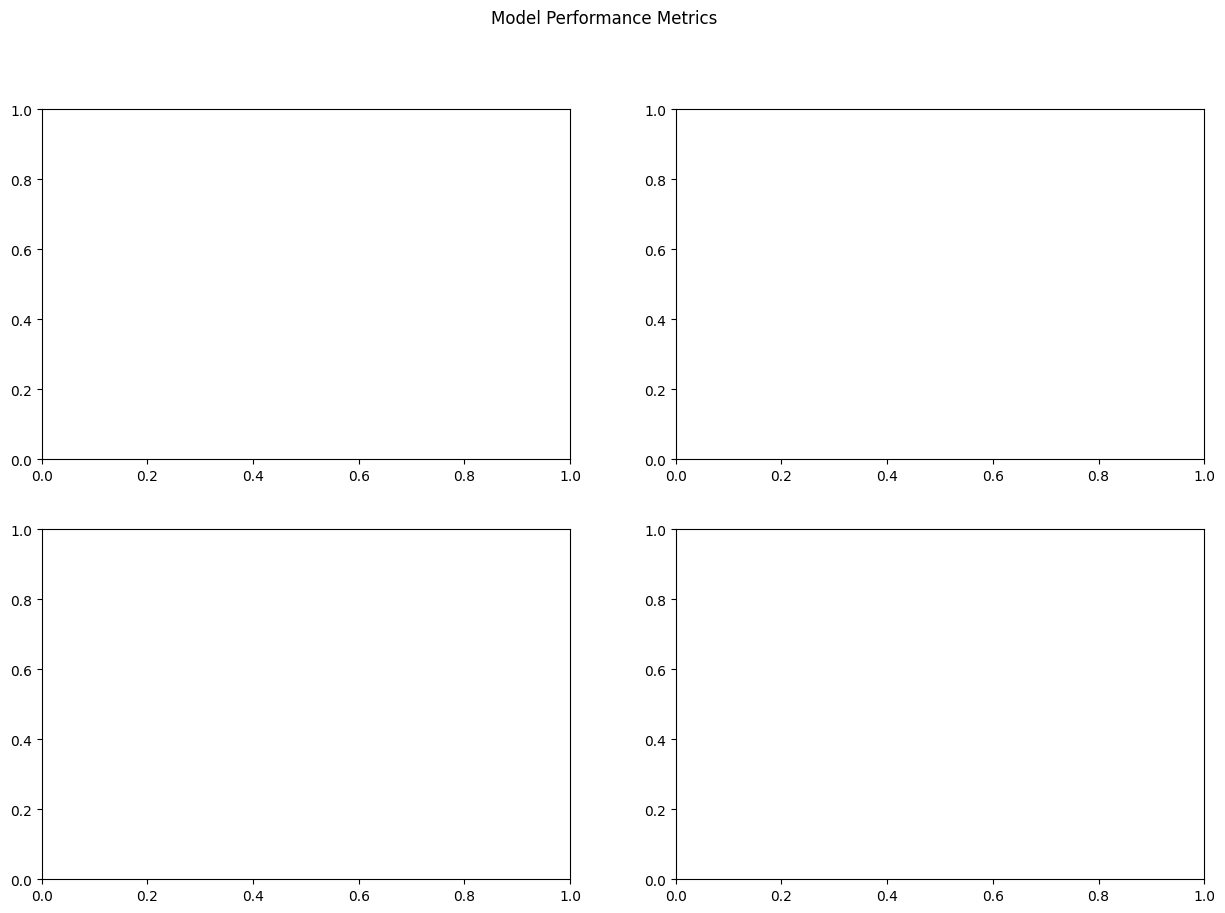

In [26]:
# Classification Accuracy of Algorithmms
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Initialize models
models = {
    "Logistic Regression" : LogisticRegression(max_iter=10000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state = 42)
}

# Evauate the metrics
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1_score": f1_score,
    "ROC AUC": roc_auc_score
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # calculate metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f"{model_name} {metric_name}: {metric_value}")

        if metric_name == "ROC AUC":
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f"{model_name} ROC AUC")

            plt.plot(fpr, tpr, label = f"{model_name} ROC AUC")

            plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend
    plt.show()

    # Bar plots for other metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Metrics')

for i, (metric_name, values) in enumerate(metric_value.items()):
    if metric_name == "ROC AUC":
        continue  # Skip ROC AUC as it's already plotted
    ax = axs[i // 2, i % 2]
    ax.bar(models.keys(), values)
    ax.set_title(metric_name)
    ax.set_ylim([0, 1])
    for j, value in enumerate(values):
        ax.text(j, value + 0.01, f'{value:.2f}', ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
